In [ ]:
# load data
import numpy as np
import pandas as pd

data_df = pd.read_csv('data_3_1_2.csv')
data_df.head()

,x1,x2,class
0,9.076,3.721,0
1,6.809,3.930,0
2,8.256,2.851,1
3,8.461,3.145,1
4,6.783,3.188,1


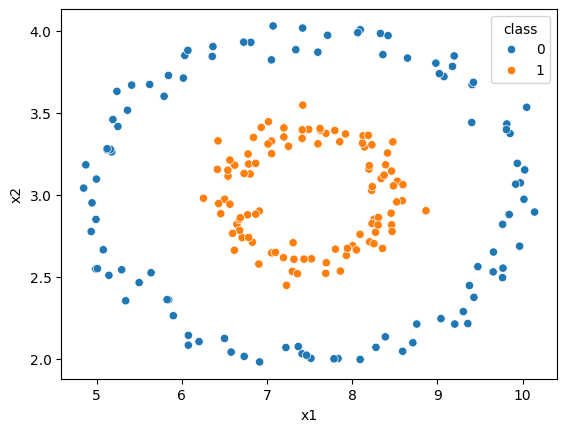

In [ ]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='x1', y='x2', hue='class', data=data_df)
plt.show()

In [ ]:
# Split X and y
data_arr = data_df.to_numpy()
X = data_arr[:, 0:2]
y = data_arr[:, 2]
print(X.shape)
print(y.shape)

(200, 2)
(200,)


In [ ]:
# Split train and test
X_train = X[:120]
y_train = y[:120]
X_test = X[120:]
y_test = y[120:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 2)
(120,)
(80, 2)
(80,)


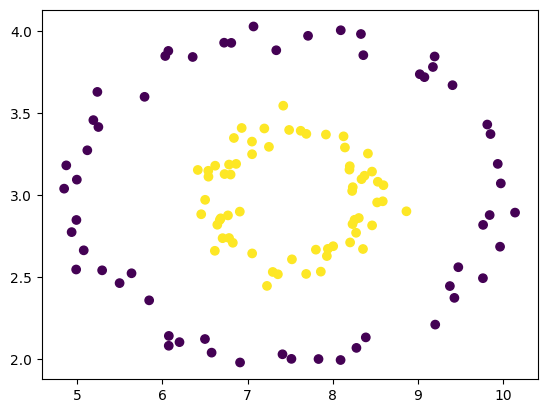

In [ ]:
# visualize training set
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

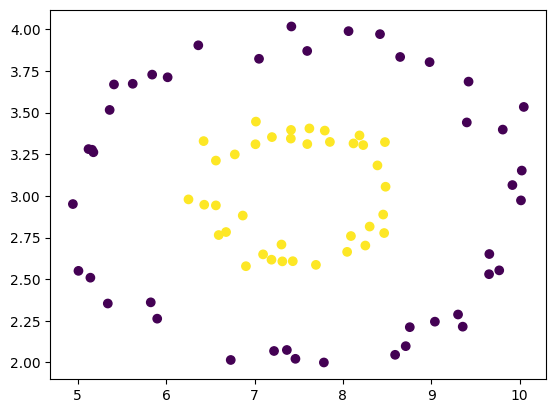

In [ ]:
# visualize test set
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

In [ ]:
# Feature scaling
def scale(X):
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X_scaled = (X - mean) / std
  return X_scaled, mean, std

X_train, mean, std = scale(X_train)
X_test = (X_test - mean) / std
print(X_train[:5])
print(X_test[:5])

[[ 1.20308374  1.39928397]
 [-0.48853125  1.79822043]
 [ 0.59120713 -0.26136065]
 [ 0.74417628  0.2998227 ]
 [-0.50793221  0.38190054]]
[[-0.58628227 -0.39115816]
 [-0.20274009 -0.70801679]
 [-0.18110055 -1.75403201]
 [ 1.83137656  0.14711975]
 [-1.16756505 -1.38372735]]


In [ ]:
# Convert array to tensor
import torch

tX_train = torch.tensor(X_train, dtype=torch.float32)
ty_train = torch.tensor(y_train, dtype=torch.float32)
tX_test = torch.tensor(X_test, dtype=torch.float32)
ty_test = torch.tensor(y_test, dtype=torch.float32)
print(tX_train.shape)
print(ty_train.shape)
print(tX_test.shape)
print(ty_test.shape)

torch.Size([120, 2])
torch.Size([120])
torch.Size([80, 2])
torch.Size([80])


## Model 1:
$h(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)  $
where
$ g(z) = \frac{1}{1+e^{-z}} $

In [ ]:
tX_train_new = torch.cat((torch.ones(len(tX_train),1),tX_train, tX_train**2), dim=1)

# initial param
theta = torch.zeros((5,1), dtype=torch.float32, requires_grad=True)

import torch.optim as optim
import torch.nn as nn

cost_func = nn.BCELoss()

optimizer = optim.SGD([theta], lr=10)

for epoch in range(500):
  h = torch.sigmoid(torch.matmul(tX_train_new, theta))
  cost = cost_func(h, ty_train.view(-1,1))
  cost.backward() # compute gradient
  optimizer.step() # update param
  optimizer.zero_grad()
  print(f'Epoch: {epoch+1:03d}, Cost: {cost.item():.4f}')

Epoch: 001, Cost: 0.6931
Epoch: 002, Cost: 1.0138
Epoch: 003, Cost: 0.0503
Epoch: 004, Cost: 0.0342
Epoch: 005, Cost: 0.0306
Epoch: 006, Cost: 0.0281
Epoch: 007, Cost: 0.0260
Epoch: 008, Cost: 0.0243
Epoch: 009, Cost: 0.0227
Epoch: 010, Cost: 0.0214
Epoch: 011, Cost: 0.0202
Epoch: 012, Cost: 0.0192
Epoch: 013, Cost: 0.0183
Epoch: 014, Cost: 0.0174
Epoch: 015, Cost: 0.0167
Epoch: 016, Cost: 0.0160
Epoch: 017, Cost: 0.0153
Epoch: 018, Cost: 0.0147
Epoch: 019, Cost: 0.0142
Epoch: 020, Cost: 0.0137
Epoch: 021, Cost: 0.0132
Epoch: 022, Cost: 0.0128
Epoch: 023, Cost: 0.0124
Epoch: 024, Cost: 0.0120
Epoch: 025, Cost: 0.0116
Epoch: 026, Cost: 0.0113
Epoch: 027, Cost: 0.0110
Epoch: 028, Cost: 0.0107
Epoch: 029, Cost: 0.0104
Epoch: 030, Cost: 0.0101
Epoch: 031, Cost: 0.0099
Epoch: 032, Cost: 0.0097
Epoch: 033, Cost: 0.0094
Epoch: 034, Cost: 0.0092
Epoch: 035, Cost: 0.0090
Epoch: 036, Cost: 0.0088
Epoch: 037, Cost: 0.0086
Epoch: 038, Cost: 0.0084
Epoch: 039, Cost: 0.0083
Epoch: 040, Cost: 0.0081


In [ ]:
# evaluate model 1
theta_model1 = theta
#print(theta_model1)
tX_test_new = torch.cat((torch.ones(len(tX_test),1),tX_test, tX_test**2), dim=1)
h = torch.sigmoid(torch.matmul(tX_test_new, theta_model1))
y_pred = torch.clone(ty_test.reshape(-1,1))
y_pred[h>=0.5] = 1
y_pred[h<0.5] = 0
#print(y_pred)
TP = ((y_pred == 1) & (ty_test == 1)).int().sum()
FP = ((y_pred == 1) & (ty_test == 0)).int().sum()
FN = ((y_pred == 0) & (ty_test == 1)).int().sum()

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F_score = 2 * Precision * Recall / (Precision + Recall)

Accuracy1 = (y_pred == ty_test).sum().item()/len(ty_test)

print(f'Precision: {Precision:.4f}')
print(f'Recall: {Recall:.4f}')
print(f'F_score: {F_score:.4f}')
print(f'Accuracy: {Accuracy1:.4f}')

Precision: 0.4625
Recall: 0.4625
F_score: 0.4625
Accuracy: 40.2250


In [ ]:
# evaluate model 1 on training set
h = torch.sigmoid(torch.matmul(tX_train_new, theta_model1))
y_pred = torch.clone(ty_train.reshape(-1,1))
y_pred[h>=0.5] = 1
y_pred[h<0.5] = 0
#print(y_pred)
TP = ((y_pred == 1) & (ty_train == 1)).int().sum()
FP = ((y_pred == 1) & (ty_train == 0)).int().sum()
FN = ((y_pred == 0) & (ty_train == 1)).int().sum()

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F_score = 2 * Precision * Recall / (Precision + Recall)

Accuracy1 = (y_pred == ty_train).sum().item()/len(ty_train)

print(f'Precision: {Precision:.4f}')
print(f'Recall: {Recall:.4f}')
print(f'F_score: {F_score:.4f}')
print(f'Accuracy: {Accuracy1:.4f}')

Precision: 0.5250
Recall: 0.5250
F_score: 0.5250
Accuracy: 60.1500


## Model 2: Neural Network with two hidden layers 5 neurons each

In [ ]:
def Model2(X, W1, b1, W2, b2, W3, b3):
  # layer1
  Z1 = torch.matmul(X, W1) + b1
  A1 = torch.sigmoid(Z1)

  # layer2
  Z2 = torch.matmul(A1, W2) + b2
  A2 = torch.sigmoid(Z2)

  # layer3
  Z3 = torch.matmul(A2, W3) + b3
  output = torch.sigmoid(Z3)

  return output

In [ ]:
# initialize param
W1 = torch.randn((2, 5), dtype=torch.float32, requires_grad=True)
b1 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
W2 = torch.randn((5, 5), dtype=torch.float32, requires_grad=True)
b2 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
W3 = torch.randn((5, 1), dtype=torch.float32, requires_grad=True)
b3 = torch.randn((1, 1), dtype=torch.float32, requires_grad=True)

cost_func2 = nn.BCELoss()
optimizer2 = optim.SGD([W1, b1, W2, b2, W3, b3], lr=1)

for i in range(500):
  h = Model2(tX_train, W1, b1, W2, b2, W3, b3)
  cost = cost_func2(h, ty_train.view(-1,1))
  cost.backward()
  optimizer2.step()
  optimizer2.zero_grad()
  print(f'Epoch: {i+1:03d}, Cost: {cost.item():.4f}')

In [ ]:
# evaluate model 2
h = Model2(tX_test, W1, b1, W2, b2, W3, b3)
y_pred = torch.clone(ty_test.reshape(-1,1))
y_pred[h>=0.5] = 1
y_pred[h<0.5] = 0
#print(y_pred)
TP = ((y_pred == 1) & (ty_test == 1)).int().sum()
FP = ((y_pred == 1) & (ty_test == 0)).int().sum()
FN = ((y_pred == 0) & (ty_test == 1)).int().sum()

Precision2 = TP / (TP + FP)
Recall2 = TP / (TP + FN)
F_score2 = 2 * Precision2 * Recall2 / (Precision2 + Recall2)

Accuracy2 = (y_pred == ty_test).int().sum()/len(ty_test)

print(f'Precision: {Precision2:.4f}')
print(f'Recall: {Recall2:.4f}')
print(f'F_score: {F_score2:.4f}')
print(f'Accuracy: {Accuracy2:.4f}')

In [ ]:
# evaluate model 2 on training set
h = Model2(tX_train, W1, b1, W2, b2, W3, b3)
y_pred = torch.clone(ty_train.reshape(-1,1))
y_pred[h>=0.5] = 1
y_pred[h<0.5] = 0
#print(y_pred)
TP = ((y_pred == 1) & (ty_train == 1)).int().sum()
FP = ((y_pred == 1) & (ty_train == 0)).int().sum()
FN = ((y_pred == 0) & (ty_train == 1)).int().sum()

Precision2 = TP / (TP + FP)
Recall2 = TP / (TP + FN)
F_score2 = 2 * Precision2 * Recall2 / (Precision2 + Recall2)

Accuracy2 = (y_pred == ty_test).int().sum()/len(ty_test)

print(f'Precision: {Precision2:.4f}')
print(f'Recall: {Recall2:.4f}')
print(f'F_score: {F_score2:.4f}')
print(f'Accuracy: {Accuracy2:.4f}')